# preprocessing

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/amazon_reviews.txt', sep='\t')
df.head(3)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...


As we can see the dataset is completely balanced. label 1 if for fake reviews, label 2 for real reviews. As we can see there are no null values.

In [3]:
df['LABEL'].value_counts()

LABEL
__label1__    10500
__label2__    10500
Name: count, dtype: int64

In [4]:
df['PRODUCT_CATEGORY'].value_counts()

PRODUCT_CATEGORY
PC                        700
Wireless                  700
Watches                   700
Musical Instruments       700
Home Entertainment        700
Pet Products              700
Lawn and Garden           700
Apparel                   700
Video Games               700
Luggage                   700
Outdoors                  700
Shoes                     700
Home Improvement          700
Tools                     700
Video DVD                 700
Grocery                   700
Books                     700
Jewelry                   700
Home                      700
Sports                    700
Camera                    700
Electronics               700
Furniture                 700
Kitchen                   700
Toys                      700
Health & Personal Care    700
Beauty                    700
Office Products           700
Baby                      700
Automotive                700
Name: count, dtype: int64

In [5]:
df.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

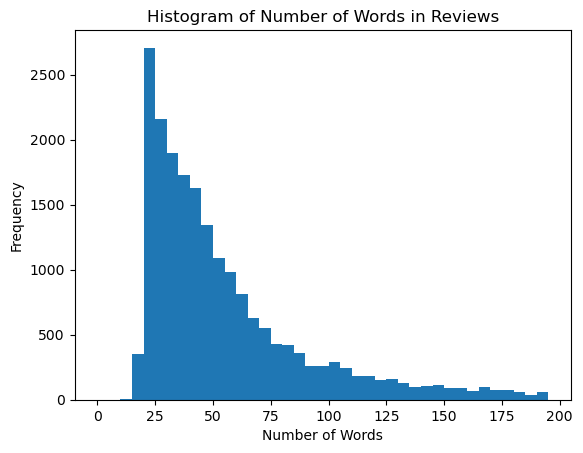

In [13]:
import matplotlib.pyplot as plt

word_counts = df['REVIEW_TEXT'].apply(lambda x: len(x.split()))
plt.hist(word_counts, bins=range(0, 200, 5))
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words in Reviews')
plt.show()

# NLP preprocessing:

In [6]:
from nltk import pos_tag, PorterStemmer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet


def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# preprocess consist of removing stopwords and lemmatizing the words
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = PorterStemmer()
        self.stop_words = list(stopwords.words('english'))
        self.tokenizer = RegexpTokenizer(r'\b(?:(?!www\.|http|\.com)[a-z]{2,})\b')
    def __call__(self, articles):
        tokens = [self.wnl.stem(x) for x in self.tokenizer.tokenize(articles) if x not in self.stop_words]
        return tokens

reviews = df['REVIEW_TEXT']

vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
X = vectorizer.fit_transform(reviews)
print(*vectorizer.get_feature_names_out())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


aa aaa aaaaa aaaaaaa aaaall aaaand aaaha aaex aamco aaron aav ab aback abalon abandon abat abbey abc abd abdomen abdor abdtech abduct abdul abel aberr abhishek abhor abid abil abit abl ableton abli abnorm aboard abod abolish abomin aborigin abort abound abour abraham abras abroad abrubtli absenc absent absolut absolutley absolutli absorb absorpt absoutli abstergo abstin abstract absurd absurdli abt abund abundantli abus abut abysm ac academ academi acai acc acceler acceleromet accent accentu accept accesori accesorio access accessor accessori accesspoint accid accident acclaim acclim accolad accommod accomod accompani accomplic accomplish accopmplish accord accordingli accordion account accross accumul accur accuraci accus accustom accuur ace acer acess aceton acetyl ach achi achidna achiev achil acid acidi acii acknowledg acn acneefre acommod acorn acost acoust acp acquablend acquaint acquir acr acreag acrid acroama acrobat acroni across acryl act action actiontec activ activex activi

# model evaluation

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(clf, X, df['LABEL'], cv=5)
print(scores)

[0.59785714 0.555      0.6047619  0.62047619 0.60904762]


In [25]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from scipy.sparse import hstack

encoder = OneHotEncoder(sparse_output=True)
sparse_column = encoder.fit_transform(df[['VERIFIED_PURCHASE']])

X =  pd.DataFrame.sparse.from_spmatrix(hstack([X, sparse_column]))
print(X)
scores = cross_val_score(clf, X, df['LABEL'], cv=5)
print(scores)

KeyboardInterrupt: 